In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [94]:


df = pd.read_csv('telnetscan.csv', parse_dates = ['timestamp'] )


In [95]:
# df.ip.value_counts()
# df = df.drop_duplicates(['ip'])
df['timestamp'] = df['timestamp'].dt.date

In [96]:
days = df.timestamp.unique()
df.drop_duplicates(subset=['ip'], inplace=True)
df

,timestamp,ip,protocol,port,hostname,tag,asn,geo,region,city,naics,sic,banner
0,2018-01-01,185.42.87.77,tcp,2323,NaN,telnet-alt,206250,NL,ZUID-HOLLAND,ALPHEN AAN DEN RIJN,0,0,||||Account:
1,2018-01-01,88.159.38.196,tcp,2323,NaN,telnet-alt,39309,NL,UTRECHT,AMERSFOORT,0,0,SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u3|
2,2018-01-01,213.124.77.58,tcp,2323,d57c4d3a.static.ziggozakelijk.nl,telnet-alt,9143,NL,FRIESLAND,OOSTERWOLDE,0,0,||||Account:
3,2018-01-01,213.34.91.67,tcp,2323,d5225b43.static.ziggozakelijk.nl,telnet-alt,9143,NL,GELDERLAND,CULEMBORG,0,0,|Wandy v5.25|Login:
4,2018-01-01,188.205.51.226,tcp,2323,static.kpn.net,telnet-alt,1136,NL,NOORD-HOLLAND,AMSTERDAM,518210,737415,login:
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102534,2018-08-30,51.136.16.242,tcp,23,NaN,telnet,8075,NL,NOORD-HOLLAND,AMSTERDAM,334111,357101,SSH-2.0-OpenSSH_7.2p2 Ubuntu-4ubuntu2.4|
5102551,2018-08-30,178.230.206.214,tcp,23,NaN,telnet,31615,NL,ZUID-HOLLAND,BARENDRECHT,0,0,Cellular Router Configure Environmen|Username:
5102558,2018-08-30,83.232.47.153,tcp,23,host-83-232-47-153.kpn-gprs.nl,telnet,1134,NL,ZUID-HOLLAND,THE HAGUE,0,0,NaN
5102616,2018-08-30,95.98.38.217,tcp,23,NaN,telnet,31615,NL,ZUID-HOLLAND,THE HAGUE,0,0,Login to telnet. (your ip: 74.82.47.5 is regis...


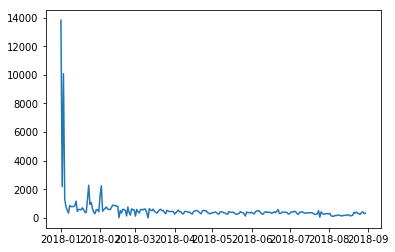

In [97]:
x = df.timestamp.value_counts().sort_index()
plt.plot(x)

In [98]:
df['hostname2'] = df.hostname.str.rsplit(".", n=2, expand=False)


In [101]:
df2 = df.dropna(subset = ["hostname2"])

In [100]:
df2['hostname2'] = df2.hostname2.apply(lambda x : str(x[-2]) + "." + str(x[-1]) if len(x) > 1 else x)



c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
df2['hostname2'] = df2['hostname2'].astype('str') 
df2.hostname2.unique


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<bound method Series.unique of 2          ziggozakelijk.nl
3          ziggozakelijk.nl
4                   kpn.net
5                routit.net
7                 online.nl
                 ...       
5101953         kpn-gprs.nl
5102240            ziggo.nl
5102404         kpn-gprs.nl
5102558         kpn-gprs.nl
5102698          edpnet.net
Name: hostname2, Length: 52636, dtype: object>

In [ ]:
word_list = ["login", "username", "login" , "account", "user"]
endresult = dict()
hosts = df2.hostname2.tolist()
for host in hosts:
    df_host = df2.loc[df2['hostname2'] == host]
    result = list()
    for day in days:
        vc = df_host.loc[df_host.timestamp == day].banner.value_counts()
        total_banner = 0
        total_count = 0
        for banner,count in vc.items():
            for word in word_list:
                if word in  banner.lower():
        #             print(banner)
                    total_banner += 1 
                    total_count += count
                    break
        if len(df_host.loc[df_host.timestamp == day]) > 0:
            result.append(total_count/df_host.loc[df_host.timestamp == day].shape[0])
    endresult[host] = np.mean(result)

endresult

In [90]:
dfsld = df2.groupby(['hostname2'])
dfsld.head(10)
df3 = df2[['hostname2', 'region']]
df3.hostname2.unique
df2.region.unique()


array(['FRIESLAND', 'GELDERLAND', 'NOORD-HOLLAND', 'OVERIJSSEL',
       'ZEELAND', 'ZUID-HOLLAND', 'FLEVOLAND', 'UTRECHT', 'DRENTHE',
       'NOORD-BRABANT', 'LIMBURG', 'NETHERLANDS', 'GRONINGEN'],
      dtype=object)

In [48]:
df3.head(5)

,hostname2,region
2,ziggozakelijk.nl,FRIESLAND
3,ziggozakelijk.nl,GELDERLAND
4,kpn.net,NOORD-HOLLAND
5,routit.net,OVERIJSSEL
7,online.nl,NOORD-HOLLAND


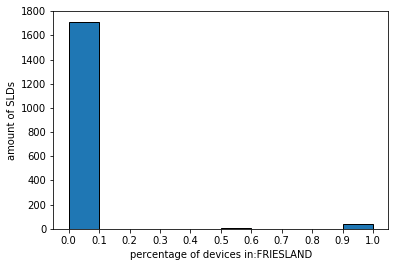

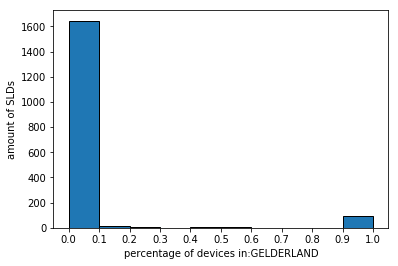

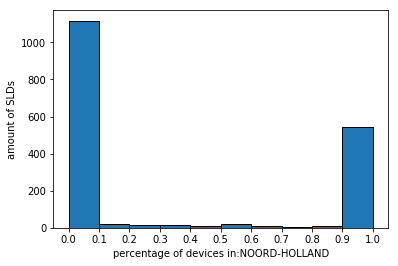

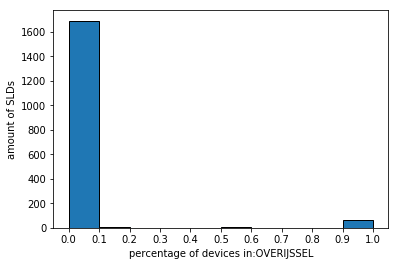

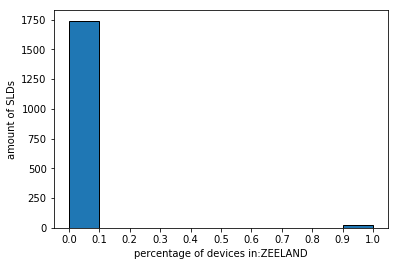

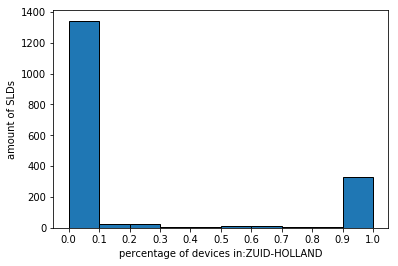

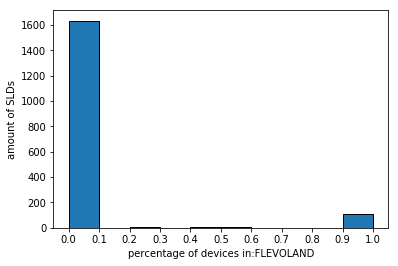

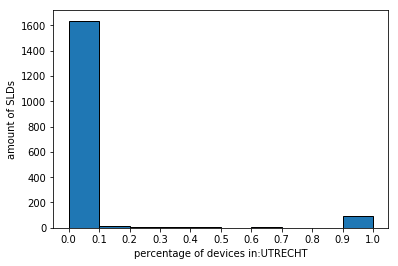

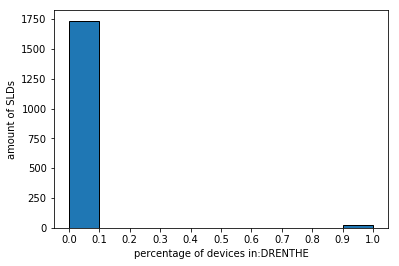

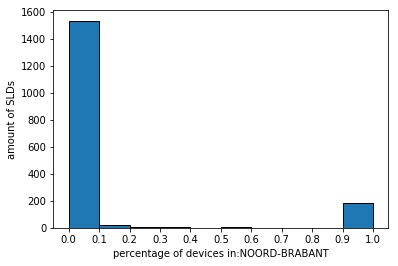

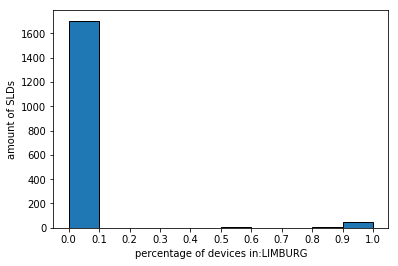

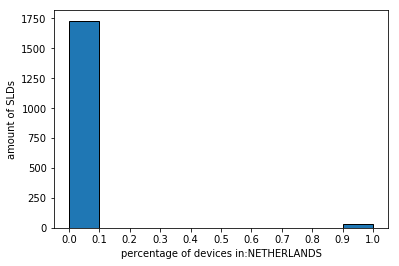

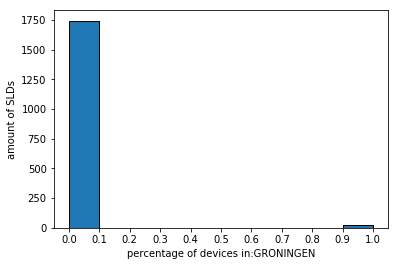

In [92]:
regions = ['FRIESLAND', 'GELDERLAND', 'NOORD-HOLLAND', 'OVERIJSSEL','ZEELAND', 'ZUID-HOLLAND', 'FLEVOLAND', 'UTRECHT', 'DRENTHE','NOORD-BRABANT', 'LIMBURG', 'NETHERLANDS', 'GRONINGEN']

for  region in regions:    
    test = df3.groupby(['hostname2']).agg(percentage_in_region = pd.NamedAgg(column='region', aggfunc= lambda x : int((x == region).sum()) / int(len(x)))).reset_index()



    bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    plt.hist(test.percentage_in_region.values, bins=bins, edgecolor="k")
    plt.xticks(bins)
    plt.xlabel('percentage of devices in:' + region)
    plt.ylabel('amount of SLDs')

    plt.show()
    
# hosts = ['kpn-gprs.nl', 'versatel.nl', 'kpn.net', 'routit.net', 'ziggo.nl']   

# for host in hosts:
#     print(test[test.hostname2 == host])
    

In [103]:
df3.groupby(['hostname2']).nunique()

,hostname2,region
hostname2,,
0l.de,1,1
1.deltahost-ptr,1,1
10gbps.io,1,1
11.be,1,1
123friluft.no,1,1
...,...,...
zorgring.nl,1,1
zozze.biz,1,1
ztomy.com,1,1


In [16]:
# vc = df.banner.value_counts()

word_list_refuse = ["reject", "refused", "refuse", "rejected", 'block']
endresult2 = dict()

hosts = ['kpn-gprs.nl', 'versatel.nl', 'kpn.net', 'routit.net', 'ziggo.nl']                      
for host in hosts:
    df_host = df2.loc[df2['hostname2'] == host]
 
    result2 = list()
    for day in days:
        vc = df_host.loc[df_host.timestamp == day].banner.value_counts()
        total_banner_block = 0
        total_count_block = 0
        for banner,count in vc.items():
            for word in word_list_refuse:
                if(word in  banner.lower() or banner == ""):
        #             print(banner)
                    total_banner_block += 1 
                    total_count_block += count
                    break
        if len(df_host.loc[df_host.timestamp == day]) > 0:
            result2.append(total_count_block/df_host.loc[df_host.timestamp == day].shape[0])
    endresult2[host] = np.mean(result2)


In [17]:
endresult2

{'kpn-gprs.nl': 0.006282367086893936,
 'versatel.nl': 0.0005771450557906887,
 'kpn.net': 0.025131521553671266,
 'routit.net': 0.0575920946165807,
 'ziggo.nl': 0.01496843157363884}

In [31]:
# df.info()

hst = 'ziggo.nl'
# {'kpn-gprs.nl': 0.6237186949627803,
#  'versatel.nl': 0.996296958252756,
#  'kpn.net': 0.7876743917834791,
#  'routit.net': 0.8436739748229162,
#  'ziggo.nl': 0.7971509662783381}   


y = [endresult[hst], 1- endresult[hst]]
x = ["Authentication", "No authentication"]

Y = [endresult2[hst], 1 -endresult2[hst]]
X = ["Refuse", "Accept"]

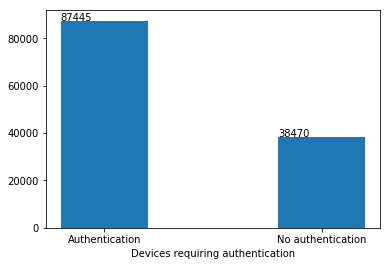

In [17]:
import matplotlib.pyplot as plt



bars = plt.bar(x, height=y, width=.4)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in x]
xlabs=[i for i in x]

plt.xlabel('Devices requiring authentication')

plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.show()

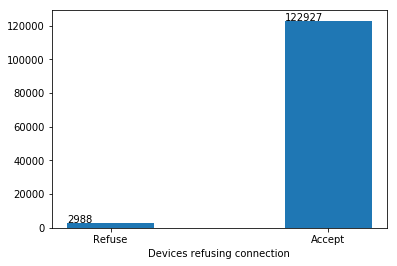

In [18]:
import matplotlib.pyplot as plt



bars = plt.bar(X, height=Y, width=.4)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in X]
xlabs=[i for i in X]

plt.xlabel('Devices refusing connection')

plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)

plt.show()

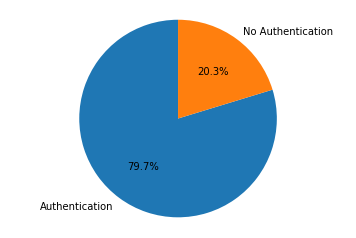

In [32]:
             


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Authentication', 'No Authentication'

fig1, ax1 = plt.subplots()
ax1.pie(y,  labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

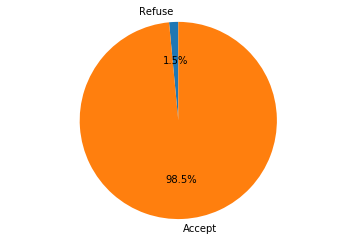

In [33]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels ="Refuse", "Accept"

fig1, ax1 = plt.subplots()
ax1.pie(Y,  labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()